<a href="https://www.kaggle.com/code/ashx010/titanic-data-analysis-and-model-deployment?scriptVersionId=136507182" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading training data
data = pd.read_csv('../input/titanic/train.csv')

# test data
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Unique Data 
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
# Null Data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Null Test Data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Note:**
* Cabin Feature have a lot of missing values, so its better of deal with by removing it completly.
* Ticket Feature, while its just random data with no relations which is also unnecessary.
* PassengerId Feature is identification number for every passenger in data which gives no usefull information to analyze. 

In [8]:
# dropping Unnecessary Features
data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

test_data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Data Processing

## Survived

In [9]:
data.Survived.unique()

array([0, 1])

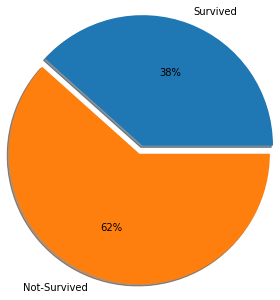

In [10]:
plt.pie(x=[len(data[data['Survived']==1]), len(data[data['Survived']==0])],
        labels =['Survived', 'Not-Survived'], explode=[0,0.1],
        autopct='%.0f%%', shadow=True, radius=1.5)
plt.show()

**Note:**
* According to Pie chart, we could say in given data only 38% Passengers Survived and Titanc really is a Disasterous Event.

## Name

In [11]:
data[['Name', 'Survived']].head(10)

,Name,Survived
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
5,"Moran, Mr. James",0
6,"McCarthy, Mr. Timothy J",0
7,"Palsson, Master. Gosta Leonard",0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1
9,"Nasser, Mrs. Nicholas (Adele Achem)",1


**Note:**
* From a look of data, we can say that every Name has a specified Inital (Mr, Mrs, Master...) and so we can  analyze this feature further on.

In [12]:
# Taking Initials from Name and Implement a new Feature
data['Initials'] = 0
data['Initials'] = data['Name'].str.extract('([A-Za-z]+)\.')

test_data['Initials'] = 0
test_data['Initials'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [13]:
pd.crosstab(data.Survived, data.Initials, margins = True)

Initials,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Survived,,,,,,,,,,,,,,,,,,
0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0,549
1,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,342
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [14]:
# Replacing Position Initials with appropriate Initials.
data['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

test_data['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [15]:
pd.crosstab(data.Initials, data.Survived, margins = True)

Survived,0,1,All
Initials,,,
Master,17,23,40
Miss,55,131,186
Mr,443,86,529
Mrs,26,101,127
Other,8,1,9
All,549,342,891


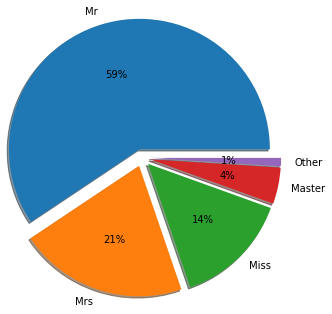

In [16]:
plt.pie(x= sorted(data.groupby('Initials')['Survived'].count().tolist(), reverse=True),
        labels =data.Initials.unique().tolist(),
        explode=[0.1]*5,
        autopct='%.0f%%', shadow=True, radius=1.5)
plt.show()

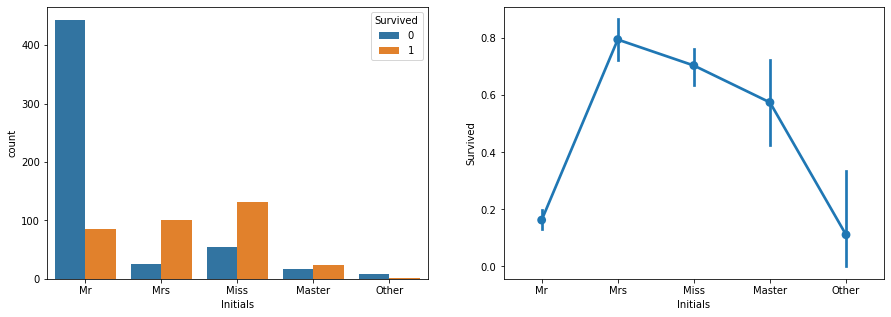

In [17]:
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.pointplot(x='Initials', y='Survived', data=data, ax=ax[1])
sns.countplot(x='Initials', hue='Survived', data=data, ax=ax[0])
plt.show()

**Note:**
* Most of Passengers have Mr. as their Initials in Name and have Low Survival.
* Whereas Passengers with Mrs and Miss Initials have High Survival.
* From above we can conclude that Sex and Age played a major role in Survival of passengers.

## Age

In [18]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Note:**
* Age here is a continous feature
* Mean, 25%, 50%, 75% of Age Feature lies from a range of 20 to 40 gives the information, That there are large number of Passengers are Adults from Age group 20 to 40

**Fixing Nan Values**

In [19]:
# Getting Age mean wrt Initials data
data.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
# Filling Null Value from Age mean wrt Initials
data.loc[(data.Age.isnull()) & (data['Initials'] == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data['Initials'] == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data['Initials'] == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data['Initials'] == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data['Initials'] == 'Other'), 'Age'] = 46

# Filling nan values in test data using Train data
test_data.loc[(test_data.Age.isnull()) & (test_data['Initials'] == 'Master'), 'Age'] = 5
test_data.loc[(test_data.Age.isnull()) & (test_data['Initials'] == 'Miss'), 'Age'] = 22
test_data.loc[(test_data.Age.isnull()) & (test_data['Initials'] == 'Mr'), 'Age'] = 33
test_data.loc[(test_data.Age.isnull()) & (test_data['Initials'] == 'Mrs'), 'Age'] = 36
test_data.loc[(test_data.Age.isnull()) & (test_data['Initials'] == 'Other'), 'Age'] = 46

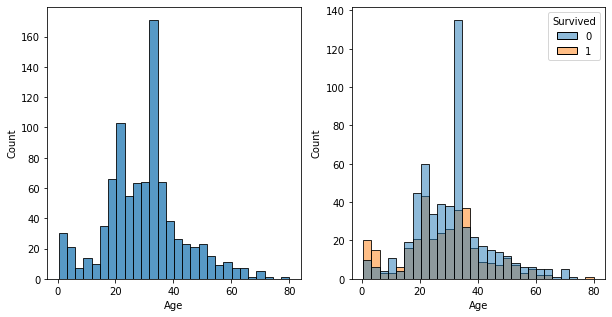

In [21]:
f,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x = 'Age', data=data, ax=ax[0])
sns.histplot(x = 'Age', hue='Survived', data=data, ax=ax[1])
plt.show()

**Changing Continous Feature to Categorial**

In [22]:
data['AgeGrp'] = pd.cut(data['Age'], bins=[0,10,20,30,45,80], labels=[1,2,3,4,5])

test_data['AgeGrp'] = pd.cut(test_data['Age'], bins=[0,10,20,30,45,80], labels=[1,2,3,4,5])

#### AGE Labels
* 1 :  0 to 10 : Kids
* 2 : 11 to 20 : Teens
* 3 : 21 to 30 : Young Adults
* 4 : 31 to 45 : Middle Aged Adults
* 5 : 45+      : Elders

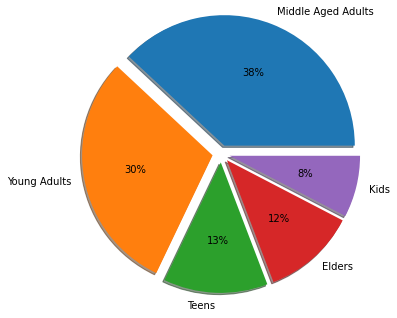

In [23]:
plt.pie(x= sorted(data.groupby('AgeGrp')['Survived'].count().tolist(), reverse=True),
        labels =['Middle Aged Adults','Young Adults','Teens','Elders','Kids'],
        explode=[0.1]*5,
        autopct='%.0f%%', shadow=True, radius=1.5)
plt.show()

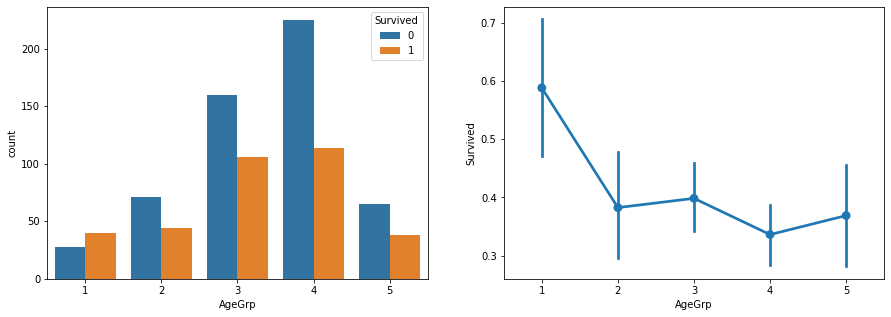

In [24]:
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='AgeGrp',hue= 'Survived', data=data,ax=ax[0])
sns.pointplot(x='AgeGrp', y='Survived', data=data, ax=ax[1])
plt.show()

In [25]:
# Value Counts
pd.crosstab(data['AgeGrp'], data['Survived'], margins=True)

Survived,0,1,All
AgeGrp,,,
1,28,40,68
2,71,44,115
3,160,106,266
4,225,114,339
5,65,38,103
All,549,342,891


In [26]:
# Survival Rate
data.groupby('AgeGrp')['Survived'].mean()

AgeGrp
1    0.588235
2    0.382609
3    0.398496
4    0.336283
5    0.368932
Name: Survived, dtype: float64

**Note:**
* Survival rate for Childrens have high Survival rate while Middle Aged Adults bieng Lowest.
* People Onboard are usually Middle-Aged i.e. from age group 31 to 45.
* Young Adults i.e. from age group 21 to 30 also have good survival rate which is slightly higher than Elders and Teens.

## Passenger class : Pclass

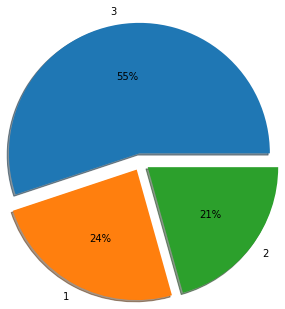

In [27]:
plt.pie(x= sorted(data.groupby('Pclass')['Survived'].count().tolist(), reverse=True),
        labels =[3,1,2],
        explode=[0.1]*3,
        autopct='%.0f%%', shadow=True, radius=1.5)
plt.show()

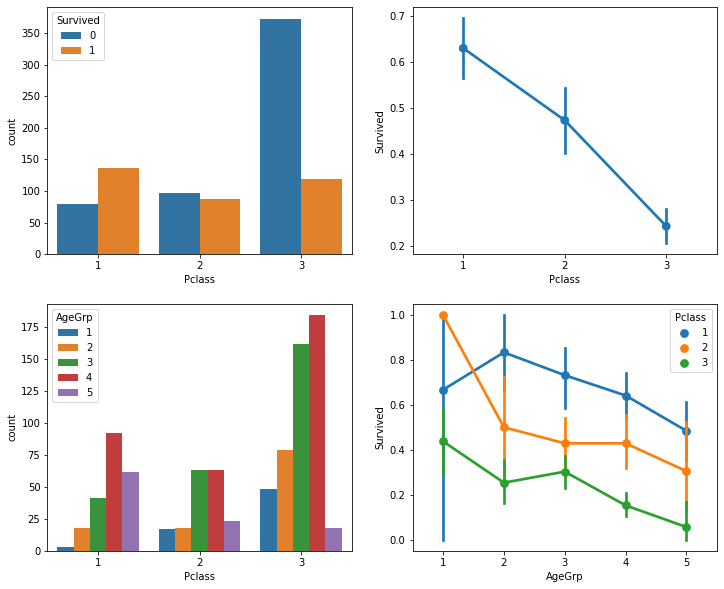

In [28]:
# Pclass
f,ax = plt.subplots(2,2,figsize=(12,10))
sns.countplot(x = 'Pclass', hue='Survived', data=data, ax=ax[0][0])
sns.pointplot(x = 'Pclass', y='Survived', data=data, ax=ax[0][1])
sns.countplot(x = 'Pclass', hue='AgeGrp', data=data, ax=ax[1][0])
sns.pointplot(x='AgeGrp', y='Survived', hue='Pclass', data=data, ax=ax[1][1])
plt.show()

**Note:**
* A lot of Passengers are from Class 3 and have lowest survival Rate among all classes.
* Class 1 has higher survival rate.
* Most of Elders are from Class 1 While Children from Class 3.
* We can conlcude that Childrens have high survival rate while bieng most from Class 3 which shows low survival for other age groups.
* All Childrens from Class 2 Suvived.
* *Childrens have given priority to survive.*
* In 3rd Class,Survival Rate for Young Adults is higher after Children.
* Survival rate keeps decreasing, with increase in Age and Pclass.

In [29]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [30]:
data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Sex

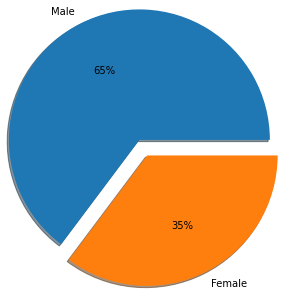

In [31]:
plt.pie(x= sorted(data.groupby('Sex')['Survived'].count().tolist(), reverse=True),
        labels =['Male', 'Female'],
        explode=[0.1]*2,
        autopct='%.0f%%', shadow=True, radius=1.5)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

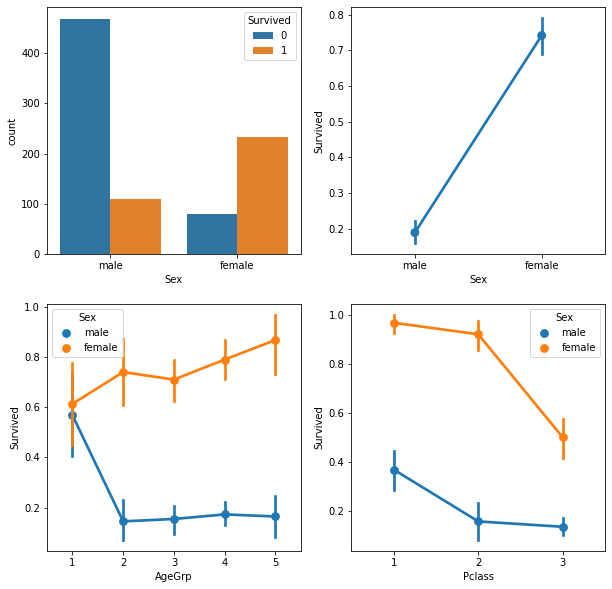

In [32]:
f, ax = plt.subplots(2,2, figsize=(10,10))
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[0][0])
sns.pointplot(x='Sex', y='Survived', data=data, ax=ax[0][1])
sns.pointplot(x='AgeGrp', y='Survived', hue='Sex', data=data, ax=ax[1][0])
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data, ax=ax[1][1])

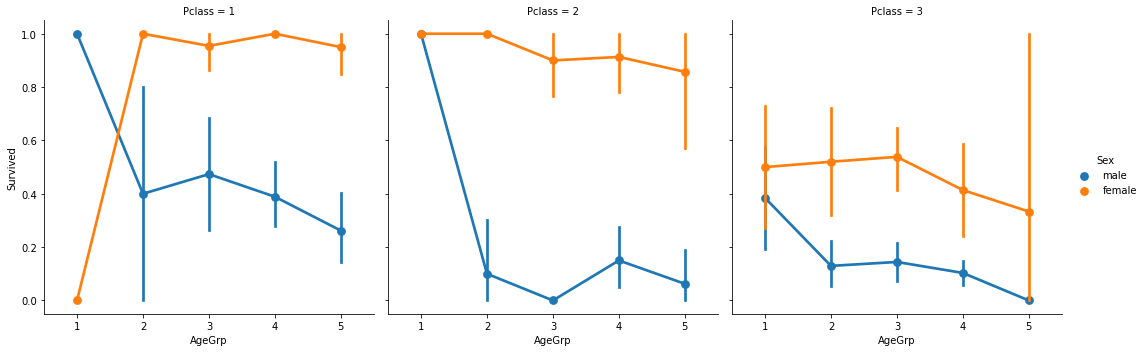

In [33]:
sns.catplot(x='AgeGrp', y='Survived', col='Pclass', hue='Sex', data=data, kind='point')

In [34]:
pd.crosstab([data.Pclass, data.Sex], data.Survived, margins =True)

Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891

In [35]:
data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [36]:
data.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [37]:
data.groupby(['AgeGrp','Sex'])['Survived'].mean()

AgeGrp  Sex   
1       female    0.612903
        male      0.567568
2       female    0.739130
        male      0.144928
3       female    0.709402
        male      0.154362
4       female    0.788889
        male      0.172691
5       female    0.866667
        male      0.164384
Name: Survived, dtype: float64

* Females have much higher survival rate than males in each Class.
* With Increase in Age Groups the Survival for Females keeps increasing.
* Males from Pclass 1 have high survival rate i.e. 36% survival rate while 13% for Pclass 3
* Young Adults and Teens in Male Group have lowest Survival Rate in Class 2.
* All Childrens from Pclass 2 Survived.

**SibSp**

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

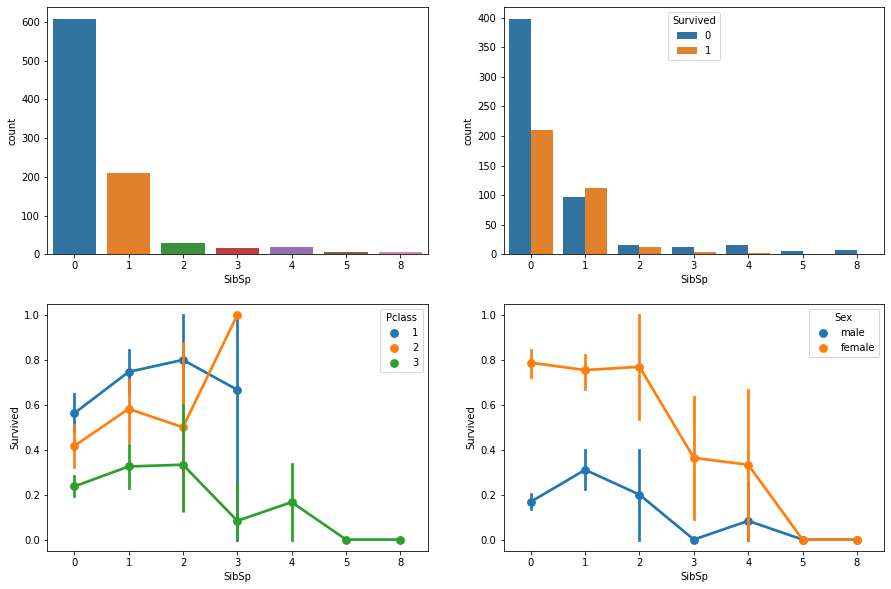

In [38]:
f,ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'SibSp',data=data, ax=ax[0][0])
sns.countplot(x = 'SibSp', hue='Survived', data=data, ax=ax[0][1])
sns.pointplot(x = 'SibSp',y= 'Survived', hue='Pclass', data=data, ax=ax[1][0])
sns.pointplot(x = 'SibSp',y= 'Survived', hue='Sex', data=data, ax=ax[1][1])

In [39]:
pd.crosstab(data.Survived,[data.SibSp, data.Sex], margins=True)

SibSp         0           1           2           3           4           5  \
Sex      female male female male female male female male female male female   
Survived                                                                      
0            37  361     26   71      3   12      7    5      4   11      1   
1           137   73     80   32     10    3      4    0      2    1      0   
All         174  434    106  103     13   15     11    5      6   12      1   

SibSp              8       All  
Sex      male female male       
Survived                        
0           4      3    4  549  
1           0      0    0  342  
All         4      3    4  891

* Numbers of Passengers with more than 1 siblings decreases significantly.
* Males with zero siblings have low survival.
* Survival rate keeps decreasing with the increment from more than two Siblings.
* Class 1 and 2 doesn't even have more than 3 siblings.

**Parch**

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

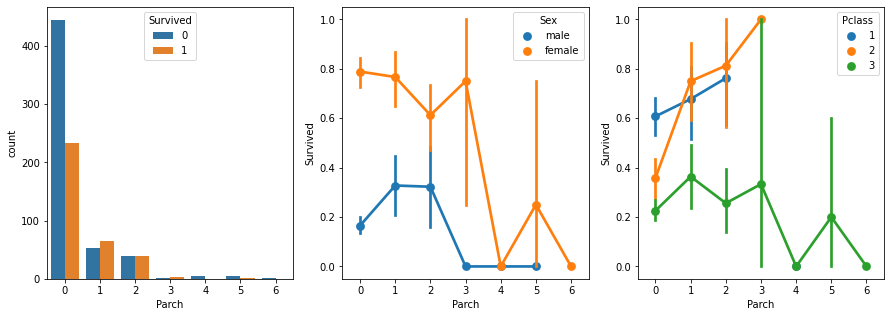

In [40]:
f,ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x='Parch', hue= 'Survived', data=data, ax=ax[0])
sns.pointplot(x='Parch', y= 'Survived', hue='Sex', data=data, ax=ax[1])
sns.pointplot(x='Parch', y= 'Survived', hue='Pclass', data=data, ax=ax[2])

In [41]:
pd.crosstab([data.Survived],[data.Parch], margins=True)

Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
All,678,118,80,5,4,5,1,891


* 76% passengers come onboard with no parents/children which reduces significantly to 1.6% with 3 or more Parch.
* Males with 1 or 2 Parents/children survived more.

# Family & Alone Features

In [42]:
data['Family'] = data['SibSp'] + data['Parch']
data['Alone'] = 0
for i in range(len(data)):
    if data.loc[i, 'Family'] == 0:
        data.loc[i, 'Alone'] = 1
        

test_data['Family'] = test_data['SibSp'] + test_data['Parch']
test_data['Alone'] = 0
for i in range(len(test_data)):
    if test_data.loc[i, 'Family'] == 0:
        test_data.loc[i, 'Alone'] = 1

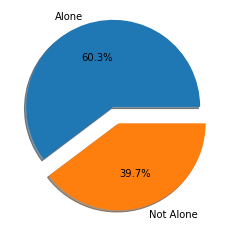

In [43]:
plt.pie(x= sorted(data.groupby('Alone')['Survived'].count().tolist(), reverse=True),
        explode=[0.1]*2,
        autopct='%0.1f%%',
        labels = ['Alone', 'Not Alone'],
        shadow=True, radius=1)
plt.show()

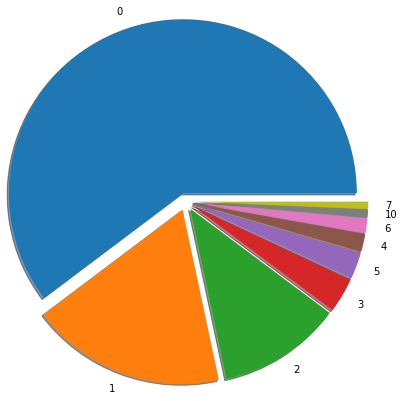

In [44]:
plt.pie(x= sorted(data.groupby('Family')['Survived'].count().tolist(), reverse=True),
        explode=[0.1]*9,
        labels = [0,1,2,3,5,4,6,10,7],
        shadow=True, radius=2)
plt.show()

<AxesSubplot:xlabel='Family', ylabel='Survived'>

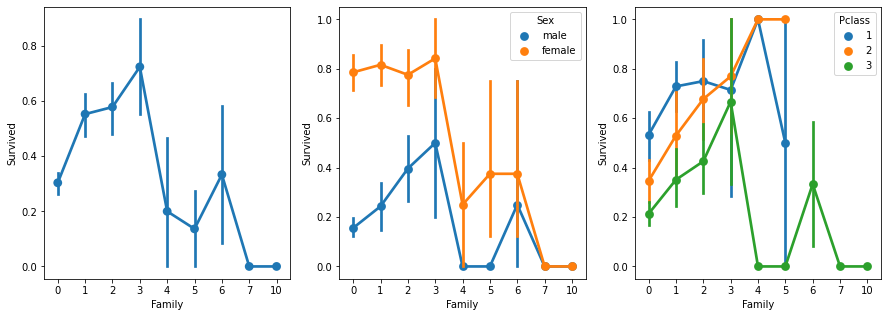

In [45]:
f,ax = plt.subplots(1, 3, figsize = (15,5))
sns.pointplot(x='Family', y= 'Survived', data=data, ax=ax[0])
sns.pointplot(x='Family', y= 'Survived', hue='Sex', data=data, ax=ax[1])
sns.pointplot(x='Family', y= 'Survived', hue='Pclass', data=data, ax=ax[2])

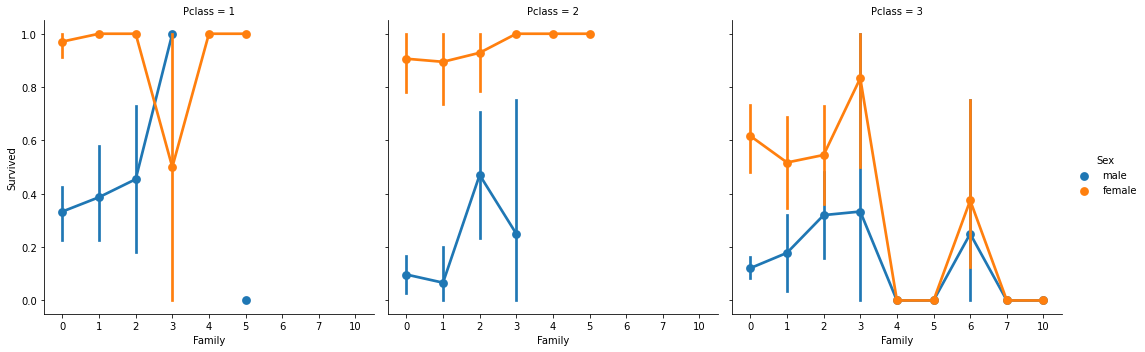

In [46]:
sns.catplot(x='Family', y='Survived', hue='Sex', col ='Pclass', data=data, kind='point')

In [47]:
data.groupby('Family')['Survived'].count()

Family
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Alone', ylabel='Survived'>

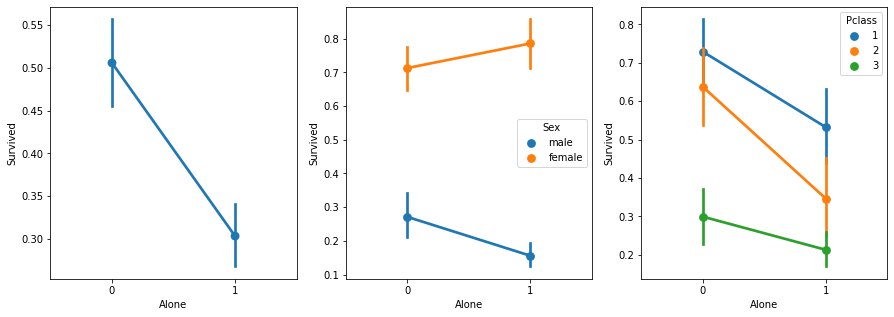

In [48]:
f,ax = plt.subplots(1, 3, figsize = (15,5))
sns.pointplot(x='Alone', y= 'Survived', data=data, ax=ax[0])
sns.pointplot(x='Alone', y= 'Survived', hue='Sex', data=data, ax=ax[1])
sns.pointplot(x='Alone', y= 'Survived', hue='Pclass', data=data, ax=ax[2])

**Notes :**
* No one Suvived with more than 7 family members.
* Females who are alone have high survival rate.
* Survival Rate keeps increasing with increase in Family upto 3 Members.
* Passengers with more than 4 Family members are usually from Class 3 and have low survival.
* Passengers with 3 Family members shows high survival rate un-usually.

# Fare

In [49]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [50]:
# Mean of Fare wrt Pclass
data.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

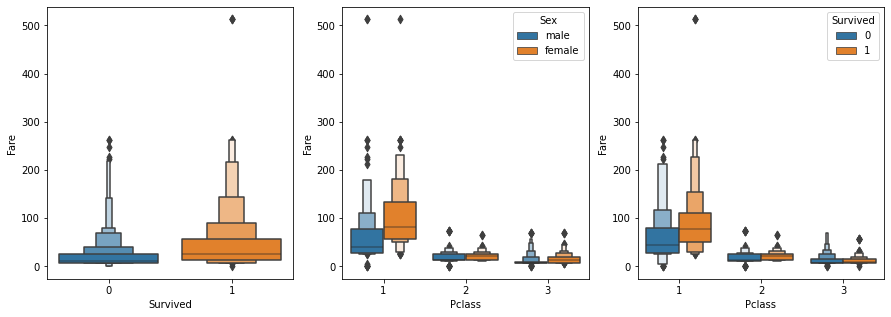

In [51]:
f,ax = plt.subplots(1,3, figsize=(15,5))
sns.boxenplot(data=data, y='Fare', x='Survived', ax=ax[0])
sns.boxenplot(data=data, y='Fare', x='Pclass',hue= 'Sex', ax=ax[1])
sns.boxenplot(data=data, y='Fare', x='Pclass',hue= 'Survived', ax=ax[2])

#### Converting to Categorial

In [52]:
data['FareGrp'] = pd.cut(data['Fare'], bins=[0,10,20,30,60,100,250,520], labels=[10,20,30,60,100,250,520], include_lowest=True)

In [53]:
# raws containing null values
test_data[test_data['Fare'].isnull() == True]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,AgeGrp,Family,Alone
152,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S,Mr,5,0,1


In [54]:
# figuring out mean wrt Pclass, Sex, Age
test_data.groupby(['Pclass', 'Sex', 'AgeGrp'])['Fare'].mean()

Pclass  Sex     AgeGrp
1       female  1                NaN
                2          56.550000
                3         114.340392
                4         113.010156
                5         124.835305
        male    1         134.500000
                2         154.737500
                3          64.137508
                4          51.340830
                5          95.421629
2       female  1          29.082300
                2          25.687500
                3          24.798608
                4          27.750000
                5          31.375000
        male    1          27.750000
                2          37.123214
                3          16.856462
                4          16.938656
                5          23.219643
3       female  1          20.798800
                2           9.826050
                3          10.756340
                4          16.733169
                5          10.727100
        male    1          16.052490
               

In [55]:
# Replacing nan value from Fare in test Data using above relations and data in observation
test_data['Fare'].replace(np.nan, 14, inplace=True)

In [56]:
# Grouping in Testing Data
test_data['FareGrp'] = pd.cut(test_data['Fare'], bins=[0,10,20,30,60,100,250,520], labels=[10,20,30,60,100,250,520], include_lowest=True)

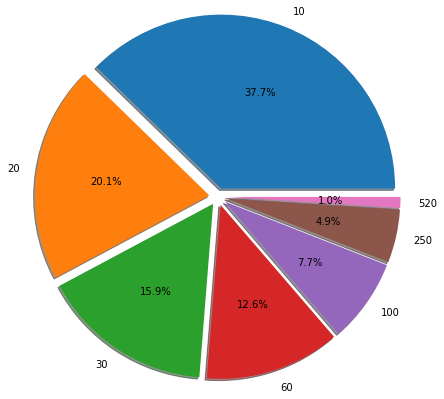

In [57]:
plt.pie(x= sorted(data.groupby('FareGrp')['Survived'].count().tolist(), reverse=True),
        explode=[0.1]*7,
        labels=[10,20,30,60,100,250,520],
        autopct = '%0.1f%%',shadow=True, radius=2)
plt.show()

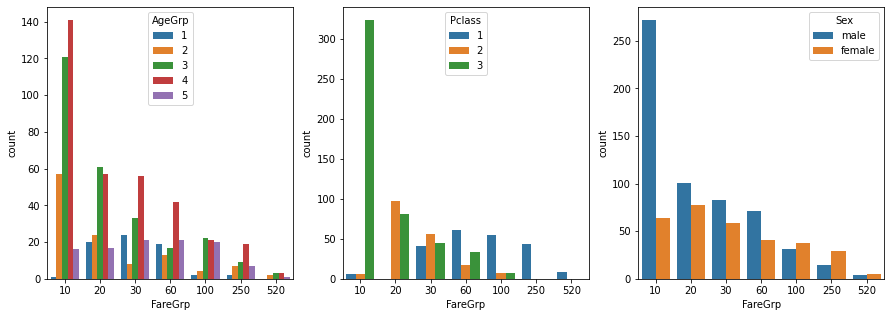

In [58]:
f,ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x='FareGrp', hue='AgeGrp', data=data, ax=ax[0])
sns.countplot(x='FareGrp', hue='Pclass', data=data, ax=ax[1])
sns.countplot(x='FareGrp', hue='Sex', data=data, ax=ax[2])
plt.show()

In [59]:
pd.crosstab(data.FareGrp, [data.Pclass, data.Sex], margins=True)

Pclass       1           2           3       All
Sex     female male female male female male     
FareGrp                                         
10           0    6      0    6     64  260  336
20           0    0     35   63     43   38  179
30           7   34     31   25     21   24  142
60          20   41      8    9     13   21  112
100         33   22      2    5      3    4   69
250         29   15      0    0      0    0   44
520          5    4      0    0      0    0    9
All         94  122     76  108    144  347  891

<AxesSubplot:xlabel='FareGrp', ylabel='Survived'>

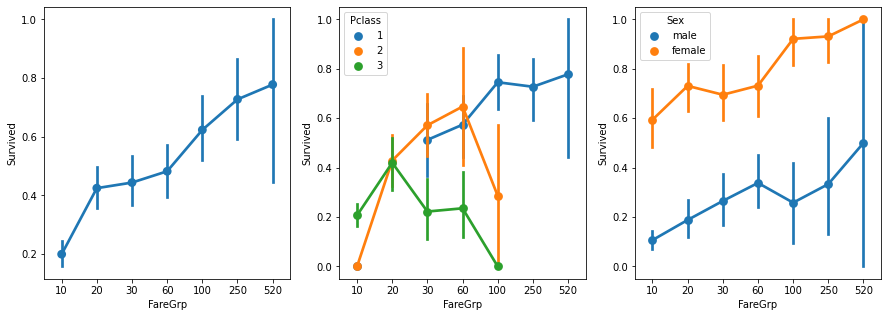

In [60]:
f,ax = plt.subplots(1, 3, figsize = (15,5))
sns.pointplot(x='FareGrp', y='Survived', data=data, ax=ax[0])
sns.pointplot(x='FareGrp', y='Survived', hue='Pclass', data=data, ax=ax[1])
sns.pointplot(x='FareGrp', y='Survived', hue='Sex', data=data, ax=ax[2])

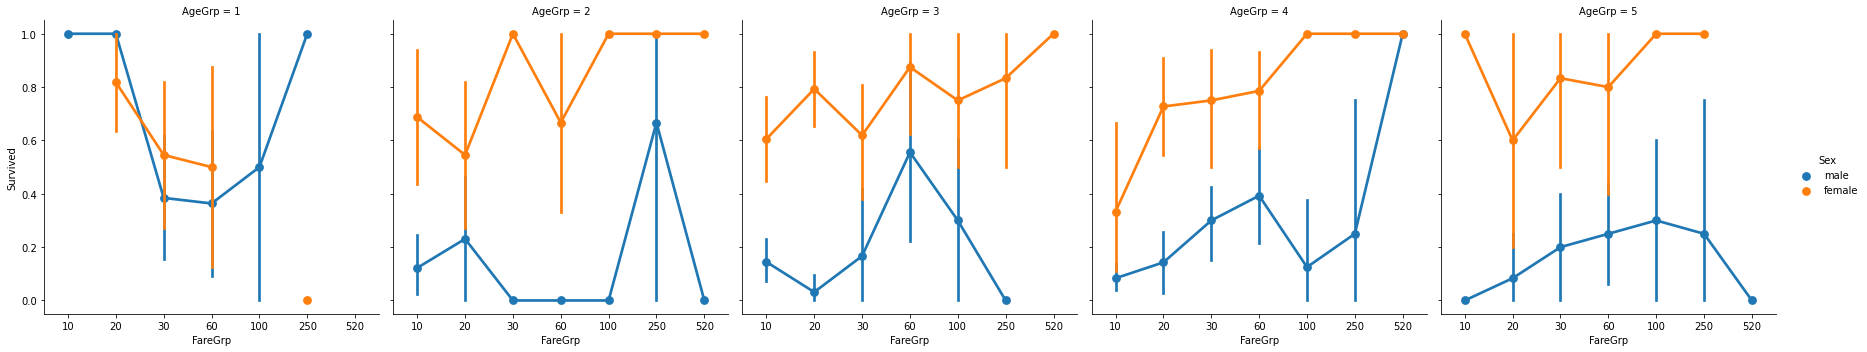

In [61]:
sns.catplot(x='FareGrp', y='Survived', col='AgeGrp', hue='Sex', data=data, kind='point')
plt.show()

* Survival rate increase with increase in Fare.
* In Pclass 1, Survival rate is higher for higher Fare Groups.
* In Pclass 3, Survival rate in higher for 10 to 20 Fare Group.
* Middle Aged Females and Elders paid more Fare than Males.
* Most of the Middle Aged Passengers puchased Tickets with lower Price.

**Embarked**

In [62]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [63]:
# Filling nan value with most frequent value
data.Embarked.fillna('S', axis=0, inplace=True)

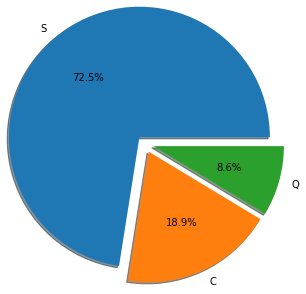

In [64]:
plt.pie(x= sorted(data.groupby('Embarked')['Survived'].count().tolist(), reverse=True),
        explode=[0.1]*3,
        labels=['S','C','Q'],
        autopct = '%0.1f%%',shadow=True, radius=1.5)
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

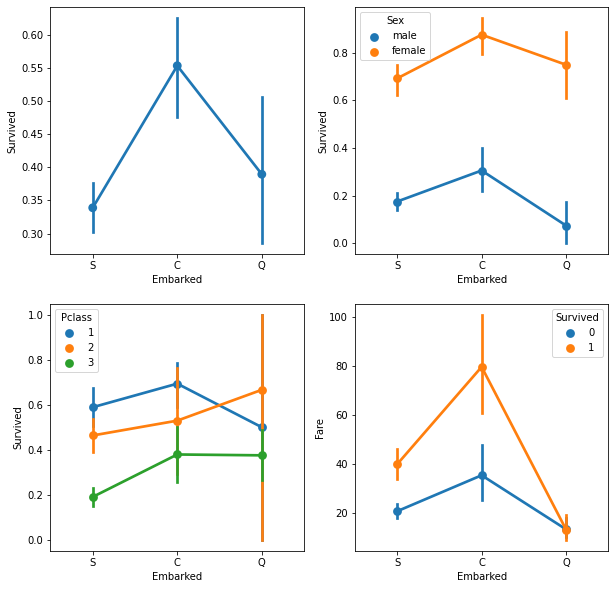

In [65]:
f,ax = plt.subplots(2,2, figsize=(10,10))
sns.pointplot(x='Embarked', y='Survived', data=data, ax=ax[0][0])
sns.pointplot(x='Embarked', y='Survived', hue='Sex', data=data, ax=ax[0][1])
sns.pointplot(x='Embarked', y='Survived', hue='Pclass', data=data, ax=ax[1][0])
sns.pointplot(x='Embarked', y='Fare', hue='Survived', data=data, ax=ax[1][1])

In [66]:
pd.crosstab([data.Embarked, data.Pclass], [data.Survived], margins=True)

Survived           0    1  All
Embarked Pclass               
C        1        26   59   85
         2         8    9   17
         3        41   25   66
Q        1         1    1    2
         2         1    2    3
         3        45   27   72
S        1        53   76  129
         2        88   76  164
         3       286   67  353
All              549  342  891

In [67]:
pd.crosstab([data.Embarked, data.Sex], [data.Survived], margins=True)

Survived           0    1  All
Embarked Sex                  
C        female    9   64   73
         male     66   29   95
Q        female    9   27   36
         male     38    3   41
S        female   63  142  205
         male    364   77  441
All              549  342  891

* C = Cherbourg, Q = Queenstown, S = Southampton
* No one from Pclass 1 aboard from Queenstown and Mostly Pclass 3 aboard from there.
* Maximum Number of people aboard from Southampton
* Passengers aboard from Cherbourg have high Fare and Survival Rate.

### Observations : 1
* Pclass 1 have high survival rate i.e. 62%.
* Males have low survival rate than Females.
* Males from Pclass1 have higher survival rate of 36% than any other Pclass.
* Females had high fare for Pclass 1 & 3 and high survival for every Pclass.
* Children had high survival, especially male children.
* 76% passengers aboard with zero siblings and parents.
* Passengers with more than 2 siblings/parents decreases significantly in number.
* 83% Males with zero siblings died while Males with 1 Sibling or Parent survived more.
* No Pclass 1 passengers aboard from Queenstown.
* Maximum number of passengers aboard from Southampton.
* Passengers aboard from cherbourg had high fare and survival rate.
* Passengers from Age Group of 30 to 40 are high in number but also low survival rate

### Observations : 2
1. According to Pie chart, we could say in given data only 38% Passengers Survived and Titanc really is a Disasterous Event.
2. From a look of data, we can say that every Name has a specified Inital (Mr, Mrs, Master...) and so we can analyze this feature further on.
3. Most of Passengers have Mr. as their Initials in Name and have Low Survival.
4. Whereas Passengers with Mrs and Miss Initials have High Survival.
5. From above we can conclude that Sex and Age played a major role in Survival of passengers.
6. Age here is a continous feature
7. Mean, 25%, 50%, 75% of Age Feature lies from a range of 20 to 40 gives the information, That there are large number of Passengers are Adults from Age group 20 to 40.
8. Survival rate for Childrens have high Survival rate while Middle Aged Adults bieng Lowest.
9. People Onboard are usually Middle-Aged i.e. from age group 31 to 45.
10. Young Adults i.e. from age group 21 to 30 also have good survival rate which is slightly higher than Elders and Teens.
11. A lot of Passengers are from Class 3 and have lowest survival Rate among all classes.
12. Class 1 has higher survival rate.
13. Most of Elders are from Class 1 While Children from Class 3.
14. We can conlcude that Childrens have high survival rate while bieng most from Class 3 which shows low survival for other age groups.
15. All Childrens from Class 2 Suvived.
16. Childrens have given priority to survive.
17. In 3rd Class,Survival Rate for Young Adults is higher after Children.
18. Survival rate keeps decreasing, with increase in Age and Pclass.
19. Females have much higher survival rate than males in each Class.
20. With Increase in Age Groups the Survival for Females keeps increasing.
21. Males from Pclass 1 have high survival rate i.e. 36% survival rate while 13% for Pclass 3
22. Young Adults and Teens in Male Group have lowest Survival Rate in Class 2.
23. All Childrens from Pclass 2 Survived.
24. Numbers of Passengers with more than 1 siblings decreases significantly.
25. Males with zero siblings have low survival.
26. Survival rate keeps decreasing with the increment from more than two Siblings.
27. Class 1 and 2 doesn't even have more than 3 siblings.
28. 76% passengers come onboard with no parents/children which reduces significantly to 1.6% with 3 or more Parch.
29. Males with 1 or 2 Parents/children survived more.
30. No one Suvived with more than 7 family members.
31. Survival Rate keeps increasing with increase in Family upto 3 Members.
32. Passengers with more than 4 Family members are usually from Class 3 and have low survival.
33. Passengers with 3 Family members shows high survival rate un-usually.
34. Survival rate increase with increase in Fare.
35. In Pclass 1, Survival rate is higher for higher Fare Groups.
36. In Pclass 3, Survival rate in higher for 10 to 20 Fare Group.
37. Middle Aged Females and Elders paid more Fare than Males.
38. Most of the Middle Aged Passengers puchased Tickets with lower Price.
39. C = Cherbourg, Q = Queenstown, S = Southampton
40. No one from Pclass 1 aboard from Queenstown and Mostly Pclass 3 aboard from there.
41. Maximum Number of people aboard from Southampton
42. Passengers aboard from Cherbourg have high Fare and Survival Rate.

# Data Preprocessing

In [68]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,AgeGrp,Family,Alone,FareGrp
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,3,1,0,10
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,4,1,0,100
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,3,0,1,10
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,4,1,0,60
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,4,0,1,10
5,0,3,"Moran, Mr. James",male,33.0,0,0,8.4583,Q,Mr,4,0,1,10
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr,5,0,1,60
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master,1,4,0,30
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs,3,2,0,20
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs,2,1,0,60


In [69]:
X = data.drop(['Name', 'Survived'], axis=1)
y = data['Survived'].values

In [70]:
feature_list = X.columns.to_list()

test_data0 = test_data[feature_list]

In [71]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,AgeGrp,Family,Alone,FareGrp
0,3,male,22.0,1,0,7.2500,S,Mr,3,1,0,10
1,1,female,38.0,1,0,71.2833,C,Mrs,4,1,0,100
2,3,female,26.0,0,0,7.9250,S,Miss,3,0,1,10
3,1,female,35.0,1,0,53.1000,S,Mrs,4,1,0,60
4,3,male,35.0,0,0,8.0500,S,Mr,4,0,1,10


In [72]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
X.loc[:, 'Embarked'] = lenc.fit_transform(X.loc[:, 'Embarked'])
X.loc[:, 'Sex'] = lenc.fit_transform(X.loc[:, 'Sex'])
X.loc[:, 'Initials'] = lenc.fit_transform(X.loc[:, 'Initials'])


test_data0.loc[:, 'Embarked'] = lenc.fit_transform(test_data0.loc[:, 'Embarked'])
test_data0.loc[:, 'Sex'] = lenc.fit_transform(test_data0.loc[:, 'Sex'])
test_data0.loc[:, 'Initials'] = lenc.fit_transform(test_data0.loc[:, 'Initials'])

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [73]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,AgeGrp,Family,Alone,FareGrp
0,3,1,22.0,1,0,7.2500,2,2,3,1,0,10
1,1,0,38.0,1,0,71.2833,0,3,4,1,0,100
2,3,0,26.0,0,0,7.9250,2,1,3,0,1,10
3,1,0,35.0,1,0,53.1000,2,3,4,1,0,60
4,3,1,35.0,0,0,8.0500,2,2,4,0,1,10


<AxesSubplot:>

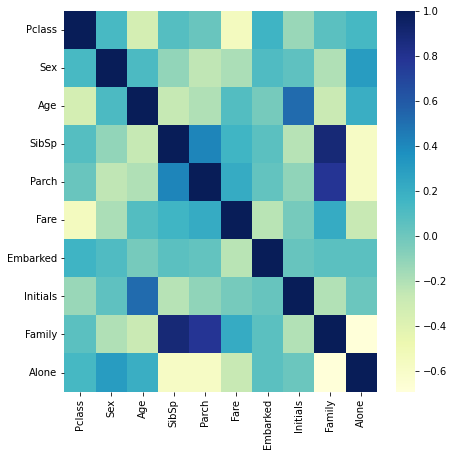

In [74]:
fig = plt.figure(figsize=(7,7))
sns.heatmap(data=X.corr(), cmap='YlGnBu')

### Training-Testing Split

In [75]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

### Feature Scaling

In [76]:
scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [77]:
test_data1 = scaler.transform(test_data0)

# Model Implementation

**Linear Logistic Model**

In [78]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression()

param_grid1 = {
    'penalty': ['l1', 'l2'],
    'C' : [0.1,1,10,100],
    'solver' : ['liblinear', 'saga']
}

grid_search1 = GridSearchCV(clf1, param_grid1, scoring='accuracy', cv=8)
grid_search1.fit(xtrain ,ytrain)

print('Parameters : ', grid_search1.best_params_,'\nAccuracy Score : ', grid_search1.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Parameters :  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'} 
Accuracy Score :  0.8047752808988764


In [79]:
# Test data
ypred1 = grid_search1.predict(xtest)

sc1 = accuracy_score(ytest, ypred1)
sc1

0.7932960893854749

**SVM Model**

In [80]:
from sklearn.svm import SVC

clf2 = SVC()

param_grid2 = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced'],
}

grid_search2 = GridSearchCV(clf2, param_grid2, scoring='accuracy', cv=5, n_jobs =1)
grid_search2.fit(xtrain, ytrain)

print('Parameters : ', grid_search2.best_params_,'\nAccuracy Score : ', grid_search2.best_score_)

Parameters :  {'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'} 
Accuracy Score :  0.8273416724120949


In [81]:
# Test Data
ypred2 = grid_search2.predict(xtest)

sc2 = accuracy_score(ytest, ypred2)
sc2

0.8044692737430168

**KNN Model**

In [82]:
from sklearn.neighbors import KNeighborsClassifier

clf3 = KNeighborsClassifier()

param_grid3 = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}
grid_search3 = GridSearchCV(clf3, param_grid3, scoring='accuracy', cv=5, n_jobs =1)
grid_search3.fit(xtrain, ytrain)

print('Parameters : ', grid_search3.best_params_,'\nAccuracy Score : ', grid_search3.best_score_)

Parameters :  {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'} 
Accuracy Score :  0.8230572244656752


In [83]:
# Test Data
ypred3 = grid_search3.predict(xtest)

sc3 = accuracy_score(ytest, ypred3)
sc3

0.7877094972067039

**Decision Tree Model**

In [84]:
from sklearn.tree import DecisionTreeClassifier

clf4 = DecisionTreeClassifier()

param_grid4 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
}

grid_search4 = GridSearchCV(clf4, param_grid4, scoring='accuracy', cv=5, n_jobs =1)
grid_search4.fit(xtrain, ytrain)

print('Parameters : ', grid_search4.best_params_,'\nAccuracy Score : ', grid_search4.best_score_)

Parameters :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5} 
Accuracy Score :  0.8399093863882596


In [85]:
# Test Data
ypred4 = grid_search4.predict(xtest)

sc4 = accuracy_score(ytest, ypred4)
sc4

0.7877094972067039

**Random Forest Model**

In [86]:
from sklearn.ensemble import RandomForestClassifier

clf5 = RandomForestClassifier()

param_grid5 = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
}

grid_search5 = GridSearchCV(clf5, param_grid5, scoring='accuracy', cv=7)
grid_search5.fit(xtrain ,ytrain)

print('Parameters : ', grid_search5.best_params_,'\nAccuracy Score : ', grid_search5.best_score_)

Parameters :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 
Accuracy Score :  0.8426935130487838


In [87]:
# Test Data
ypred5 = grid_search5.predict(xtest)

sc5 = accuracy_score(ytest, ypred5)
sc5

0.7877094972067039

## Model Selection

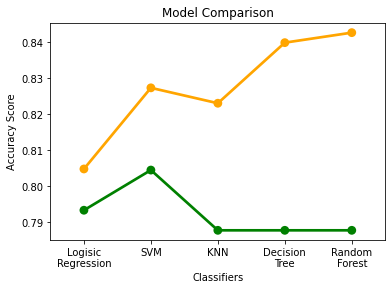

In [88]:
sns.pointplot(y = [grid_search1.best_score_,
                   grid_search2.best_score_,
                   grid_search3.best_score_,
                   grid_search4.best_score_,
                   grid_search5.best_score_], 
              x=['Logisic\nRegression','SVM','KNN','Decision\nTree','Random\nForest'], color='orange', label='Training')

sns.pointplot(y = [sc1,sc2,sc3,sc4,sc5], 
              x=['Logisic\nRegression','SVM','KNN','Decision\nTree','Random\nForest'], color='green', label='Testing')

plt.ylabel('Accuracy Score')
plt.xlabel('Classifiers')
plt.title('Model Comparison')
plt.show()

# Final Model Deployement

In [89]:
best_params = grid_search5.best_params_
final_model = RandomForestClassifier(**best_params)
final_model.fit(xtrain, ytrain)
ypredf = final_model.predict(test_data1)

In [90]:
ypredf.shape

(418,)

In [91]:
output = pd.DataFrame({'PassengerId': range(892, 1310),
                       'Survived': ypredf})
output.to_csv('submission.csv', index=False)